<h1> ________________________________________________________________________________</h1>
<h1><b>Project UAS IBDA2032 - Kecerdasan Buatan</b></h1>

<h1>Natural Language Processing</h1>


<b style="font-size:16px;">Anggota Kelompok:</b>

<ul>
    <li>Darren Nathaniel Rusly - 10101190104</li>
    <li>Jose Alfred Benaya - 10101190377</li>
    <li>Reszisca Valentiana - 10101190702</li>
</ul>
<h1> ________________________________________________________________________________</h1>

**Pemanggilan Library**

In [ ]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
import datetime
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

**Pengambilan data dari Twitter berdasarkan kata kunci "Covid Vaccine" dan pembuatan model analisis sentimen**

In [ ]:
# Authentication
consumerKey = '398CFhjDeUtvqr5hTst0Mj6Zb'
consumerSecret ='xwBhnGYvyLkWjL3vIShGTSa1dPbWxk28dUxswDiaL6q88v6pJu'
accessToken = '1393937049917399040-onzgrEzq28abboUAGJ49Pq80yCgRlz'
accessTokenSecret = 'Y0vNc4FKtONCgGOQCbYjvKYz9f3kSWVtLBqVFTWh5rVxj'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
SentimentIntensityAnalyzer().polarity_scores('quite good')

{'compound': 0.4927, 'neg': 0.0, 'neu': 0.238, 'pos': 0.762}

In [ ]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input('Please enter keyword or hashtag to search: ')
start_date = '2021-05-29'
end_date = '2021-05-29'
tweets = tweepy.Cursor(api.search, q=keyword, since=start_date, lang="en").items(1000)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
     negative_list.append(tweet.text)
     negative += 1
 elif pos > neg:
     positive_list.append(tweet.text)
     positive += 1
 
 elif pos == neg:
     neutral_list.append(tweet.text)
     neutral += 1
tweet_list = pd.DataFrame(tweet_list)
noOfTweet = len(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: covid vaccine


In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  1000
positive number:  298
negative number:  310
neutral number:  392


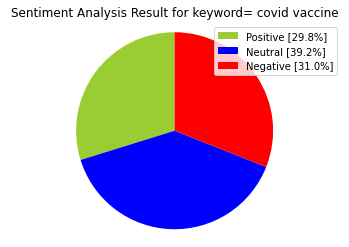

In [ ]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword= '+keyword+'' )
plt.axis('equal')
plt.show()

In [ ]:
tweet_list

,0
0,RT @BTheorists: Craig’s just posted the MS Wor...
1,Divorce Court Judge orders #COVID19Vaccine for...
2,"#Delhi reports 946 fresh COVID-19 cases, 78 mo..."
3,RT @bossjr450: Politicians and media said covi...
4,RT @SciInsider: Anti-vaxxer sheriff's deputy d...
...,...
995,RT @RzstProgramming: @Amazon is also selling a...
996,RT @KensingtonRoyal: Yesterday I received my f...
997,RT @NotTheNewz: RISK/BENEFIT ANALYSIS OF COVID...
998,RT @ChrissaSJE: Just got my 2nd covid vaccine ...


**Pembersihan data tweet dengan menghilangkan duplikat dan karakter diluar alfabet**

In [ ]:
tweet_list.drop_duplicates(inplace = True)

In [ ]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ','',x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",x)
tw_list['text'] = tw_list.text.map(remove_rt).map(rt)
tw_list['text'] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @BTheorists: Craig’s just posted the MS Wor...,craig s just posted the ms word version of his...
1,Divorce Court Judge orders #COVID19Vaccine for...,divorce court judge orders covid19vaccine for...
2,"#Delhi reports 946 fresh COVID-19 cases, 78 mo...",delhi reports 946 fresh covid 19 cases 78 mo...
3,RT @bossjr450: Politicians and media said covi...,politicians and media said covid was a killer ...
4,RT @SciInsider: Anti-vaxxer sheriff's deputy d...,anti vaxxer sheriff s deputy dies from covid 1...
5,RT @dyradyre: My sister’s friend (fully vaccin...,my sister s friend fully vaccinated positive...
6,RT @beyouonlybetter: Do you think it’s a coinc...,do you think it s a coincidence that my 45 yea...
7,"""You can't go to a Dallas Mavericks game unles...",you can t go to a dallas mavericks game unles...
8,RT @digitaldutta: Father Stan Swamy who is 84 ...,father stan swamy who is 84 year old with park...
9,"RT @GregAbbott_TX: Today, Texas surpassed 22 m...",today texas surpassed 22 million covid vaccin...


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
  tw_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
  tw_list.loc[index, 'sentiment'] = "positive"
 else:
  tw_list.loc[index, 'sentiment'] = "neutral"
  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @BTheorists: Craig’s just posted the MS Wor...,craig s just posted the ms word version of his...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
1,Divorce Court Judge orders #COVID19Vaccine for...,divorce court judge orders covid19vaccine for...,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
2,"#Delhi reports 946 fresh COVID-19 cases, 78 mo...",delhi reports 946 fresh covid 19 cases 78 mo...,0.312121,0.500000,positive,NaN,NaN,NaN,NaN
3,RT @bossjr450: Politicians and media said covi...,politicians and media said covid was a killer ...,0.000000,1.000000,positive,NaN,NaN,NaN,NaN
4,RT @SciInsider: Anti-vaxxer sheriff's deputy d...,anti vaxxer sheriff s deputy dies from covid 1...,0.000000,0.300000,negative,NaN,NaN,NaN,NaN
5,RT @dyradyre: My sister’s friend (fully vaccin...,my sister s friend fully vaccinated positive...,0.227273,0.545455,positive,NaN,NaN,NaN,NaN
6,RT @beyouonlybetter: Do you think it’s a coinc...,do you think it s a coincidence that my 45 yea...,-0.022222,0.144444,neutral,0.0,1.0,0.0,0.0
7,"""You can't go to a Dallas Mavericks game unles...",you can t go to a dallas mavericks game unles...,-0.200000,0.700000,neutral,0.0,1.0,0.0,0.0
8,RT @digitaldutta: Father Stan Swamy who is 84 ...,father stan swamy who is 84 year old with park...,0.100000,0.200000,negative,NaN,NaN,NaN,NaN
9,"RT @GregAbbott_TX: Today, Texas surpassed 22 m...",today texas surpassed 22 million covid vaccin...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0


In [ ]:
tw_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 0 to 998
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   0             477 non-null    object 
 1   text          477 non-null    object 
 2   polarity      477 non-null    float64
 3   subjectivity  477 non-null    float64
 4   sentiment     477 non-null    object 
 5   neg           166 non-null    float64
 6   neu           166 non-null    float64
 7   pos           166 non-null    float64
 8   compound      166 non-null    float64
dtypes: float64(6), object(3)
memory usage: 57.3+ KB


**Perhitungan kembali analisis sentimen dengan data yang telah dibersihkan**

In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
negative,167,35.01
neutral,166,34.80
positive,144,30.19


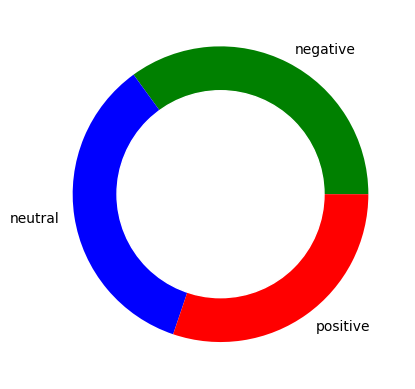

In [ ]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

**Pembuatan wordcloud**

In [ ]:
#Function to Create Wordcloud
def create_wordcloud_negative(text):
  mask = np.array(Image.open("cloud.png"))
  stopwords = set(STOPWORDS)
  wc = WordCloud(background_color="white", max_words=200, mask=mask, stopwords=stopwords)	
  wc.generate(str(text))
  wc.to_file("negative_wc.png")
  display(Image.open('negative_wc.png'))

def create_wordcloud_positive(text):
  mask = np.array(Image.open("cloud.png"))
  stopwords = set(STOPWORDS)
  wc = WordCloud(background_color="white", max_words=200, mask=mask, stopwords=stopwords)	
  wc.generate(str(text))
  wc.to_file("positive_wc.png")
  display(Image.open('positive_wc.png'))

def create_wordcloud_neutral(text):
  mask = np.array(Image.open("cloud.png"))
  stopwords = set(STOPWORDS)
  wc = WordCloud(background_color="white", max_words=200, mask=mask, stopwords=stopwords)	
  wc.generate(str(text))
  wc.to_file("neutral_wc.png")
  display(Image.open('neutral_wc.png'))

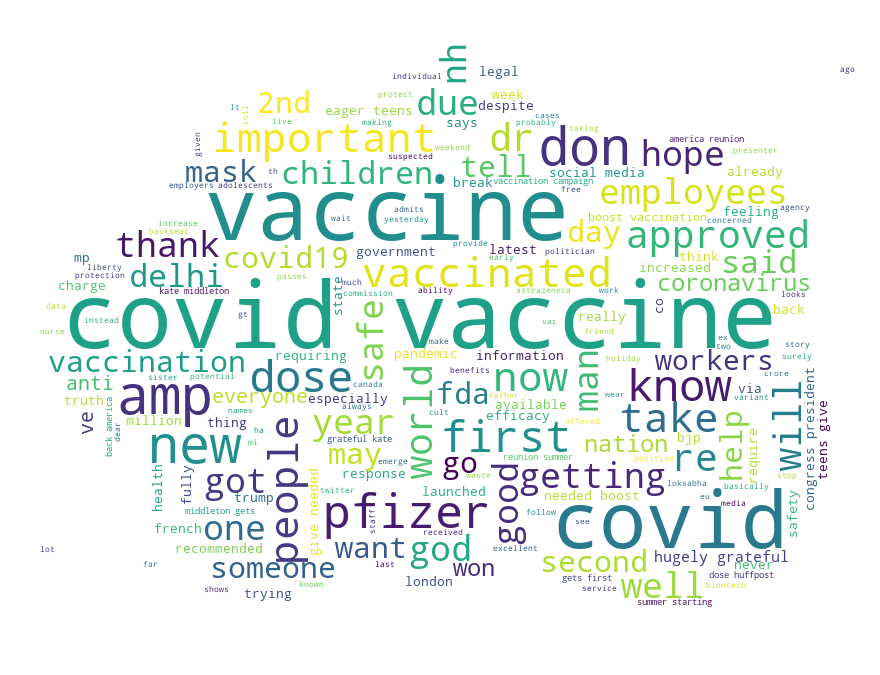

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud_positive(tw_list_positive["text"].values)

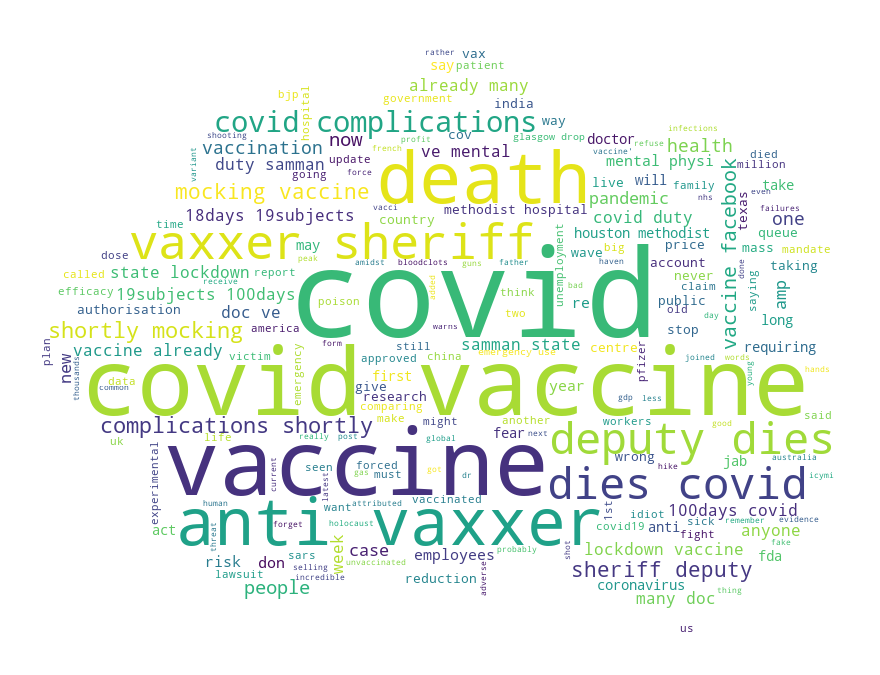

In [ ]:
create_wordcloud_negative(tw_list_negative["text"].values)

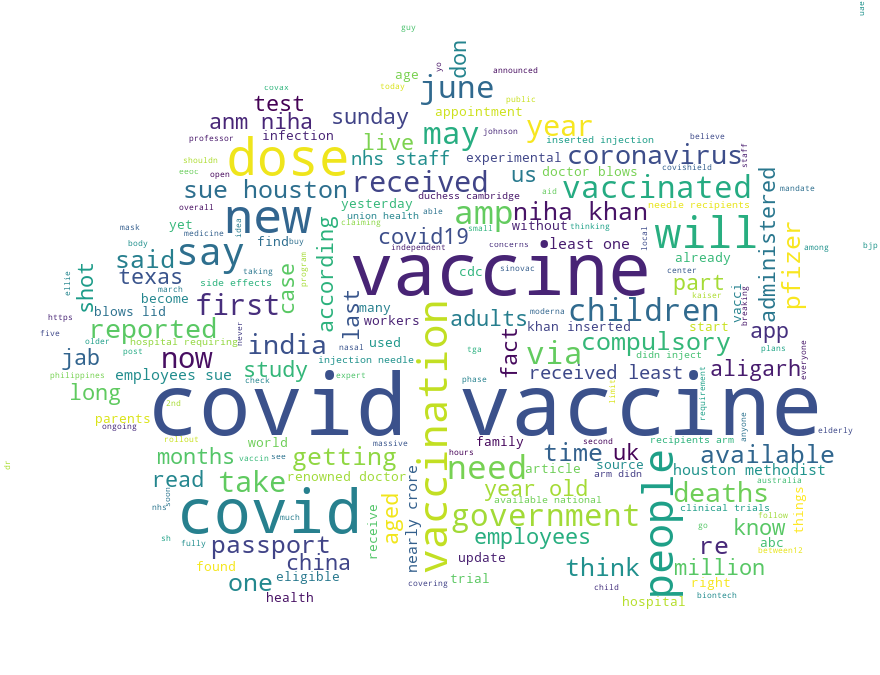

In [ ]:
create_wordcloud_neutral(tw_list_neutral["text"].values)

**Analisis contoh tweet dari setiap jenis sentimen untuk mencari kata kunci sentimen tersebut**

In [ ]:
tw_pos = tw_list_positive['text'].values
print(tw_pos[10])
SentimentIntensityAnalyzer().polarity_scores(tw_pos[10])

uh oh  a lot of astrazeneca vaccines about to expire in canada  the solution   extend the expiration date   smart move 


{'compound': 0.6908, 'neg': 0.0, 'neu': 0.705, 'pos': 0.295}

In [ ]:
SentimentIntensityAnalyzer().polarity_scores('smart move')

{'compound': 0.4019, 'neg': 0.0, 'neu': 0.27, 'pos': 0.73}

In [ ]:
tw_neu = tw_list_neutral['text'].values
print(f"'{tw_neu[0]}'")
SentimentIntensityAnalyzer().polarity_scores(tw_neu[0])

'craig s just posted the ms word version of his draft vaccine passport bill   publicity stunt via telegram   couple of lines '


{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [ ]:
tw_neg = tw_list_negative['text'].values
print(tw_neg[0])
SentimentIntensityAnalyzer().polarity_scores(tw_neg[0])

anti vaxxer sheriff s deputy dies from covid 19 complications shortly after mocking the vaccine on facebook  


{'compound': -0.6124, 'neg': 0.263, 'neu': 0.737, 'pos': 0.0}

In [ ]:
SentimentIntensityAnalyzer().polarity_scores('mocking')

{'compound': -0.4019, 'neg': 1.0, 'neu': 0.0, 'pos': 0.0}